In [1]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt

# Decay and pump

In [2]:
N = 10;
N_ini = 1;
nstate = 2;
tlist = np.linspace(0,10,200);
a = qp.destroy(N);
ad = a.dag();
IdN = qp.qeye(N);
EN = 1;

Gam = 0.5;
nth = 5;

A = [];
for i in range(nstate):
    operator_lop = [];
    for j in range(nstate):
        if i == j:
                operator_lop.append(a);
        else:
            operator_lop.append(IdN);
    operator_i = qp.tensor(operator_lop);
    A.append(operator_i);

Ad = [A[k].dag() for k in range(nstate)];

Np = [Ad[k]*A[k] for k in range(nstate)];

H = sum(EN*Np[k]*2*np.pi for k in range(nstate));

c_opt = [np.sqrt(Gam)*A[k] for k in range(nstate)];

c_opt_lost = [np.sqrt(Gam*(1+nth))*A[k] for k in range(nstate)];
c_opt_gain = [np.sqrt(Gam*(nth))*Ad[k] for k in range(nstate)];

psi_0 = [qp.fock_dm(N,N_ini) for k in range(nstate)];
psi0 = qp.tensor(psi_0);

In [3]:
ndata = qp.mesolve(H,psi0,tlist,c_opt,Np);
ndata2 = qp.mesolve(H,psi0,tlist,c_opt_lost+c_opt_gain,Np);

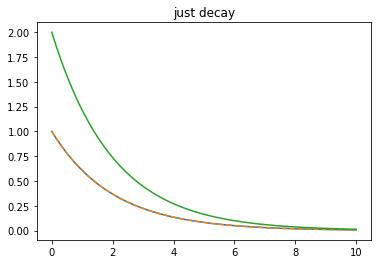

In [4]:
plt.plot(tlist,ndata.expect[0]);
plt.plot(tlist,ndata.expect[1],linestyle='dashed');
plt.plot(tlist,ndata.expect[0]+ndata.expect[1]);
plt.title('just decay');

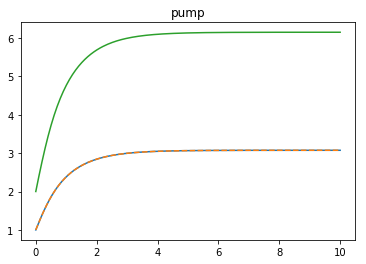

In [5]:
plt.plot(tlist,ndata2.expect[0]);
plt.plot(tlist,ndata2.expect[1],linestyle='dashed');
plt.plot(tlist,ndata2.expect[0]+ndata2.expect[1]);
plt.title('pump');

# Degenerate case one level

In [8]:
N_deg = 10;
n_deg = 2;
tlist = np.linspace(0,10,200);
a_deg = qp.destroy(N_deg);
ad_deg = a_deg.dag();


Np_deg = ad_deg*a_deg;

H_deg = EN*Np_deg*2*np.pi;

c_opt_deg = [np.sqrt(Gam)*a_deg];

c_opt_lost_deg = [np.sqrt(Gam*(1+2*nth))*a_deg];
c_opt_gain_deg = [np.sqrt(Gam*(2*nth))*ad_deg ];

psi0_deg = qp.fock_dm(N_deg,N_ini*n_deg);

In [9]:
ndata_deg = qp.mesolve(H_deg,psi0_deg,tlist,c_opt_deg,Np_deg);
ndata2_deg = qp.mesolve(H_deg,psi0_deg,tlist,c_opt_lost_deg+c_opt_gain_deg,Np_deg);

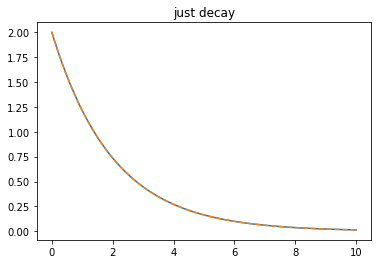

In [10]:
plt.plot(tlist,ndata_deg.expect[0]);
plt.plot(tlist,ndata.expect[0]+ndata.expect[1],linestyle='dashed');
plt.title('just decay');

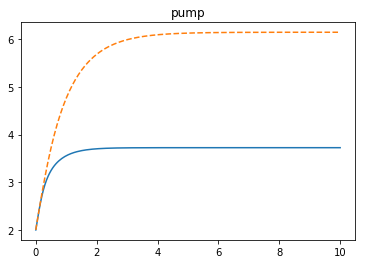

In [11]:
plt.plot(tlist,ndata2_deg.expect[0]);
plt.plot(tlist,ndata2.expect[0]+ndata2.expect[1],linestyle='dashed');
plt.title('pump');